## Reinforcement Learning
-  is used to solve interacting problems where the data observed up to time t is considered to decide which action to take at time t + 1.

- It is also used for Artificial Intelligence when training machines
-  Desired outcomes provide the AI with reward, undesired with punishment. Machines learn through trial and error.

# Upper Confidence Bound (UCB)
- UCB is a Reinforcement algorithm which uses simple strategy to maximize our profits or score

- Deterministic algoritem, where the final result, is absolute value and not a Probability.

### Multi-Armed Bandit problem

<img src='https://upload.wikimedia.org/wikipedia/en/9/92/Multi-armed-bandit.jpg' alt='Multi-Armed Bandit' width='200px' >

- A slot machine also known as a bandit with two levers. We assume that each lever has a separate distribution of rewards.

- there is at least one lever that generates maximum reward. 
- probability distribution for the reward corresponding to each lever is different and is unknown to the gambler(decision-maker).
- goal here is to identify which lever to pull to get the maximum reward after a given set of trials.

<hr>

**Question :** why not use a statistical aproach like naive bayes theorem ?
- The answere would be, naive bayes is a probability based algorithem, we will need to take large amount of Sample data for predictions to be accurate.

- UCB is based on asumption made in every round, thus generates results as fast as possible, without the need of large dataset. This helps in reducing the cost associated,
<hr>

### Example :
A company Displays **5 Ads** to Online users, They want to find out which Ads is more usefull in attracting Customers. <br> Now there are 2 terms to be taken note of:
1. **Exploration :** &rarr; when company Shows random adds to User to gether data, There is operational cost associatied to it, Therefore, can't afford it for long.

1. **Exploitation :** &rarr; Is when company has found which Ads bring more customers, and Display that add to more customers, so that Rate is Customer being attacted is higher, thus profitable.

Lets assume,
- Each time a user connects to the web page, that makes it or refered to as a round.

- At **each round** 'n', we choose to **display (Only) one Ad to the user**, 
    1. If user clicked on Ad &rarr; Reward &rarr; r<sub>i</sub>(n)= 1.
    1. If user didn't clicked &rarr; Punishment &rarr; r<sub>i</sub>(n)= 0.

- Our goal is to maximize the total reward we get over many rounds.

<img src='https://i.stack.imgur.com/04Ggq.jpg' height='200px'>

- Every add has diffrent sucess rate, Ofcource the 'D5' Ad seem more promising, but the dicision-make dosent know it,

**Steps :**<br>
1. At **Each round** n, we consider two number for each **Ad 'i'**.
    - N<sub>i</sub>(n) &rarr; the number of time the Ad 'i was selected up to round n,
    - R<sub>i</sub>(n) &rarr; the sum of rewards of Ad 'i' up to round n.

1. From these two numbers we compute,
    1. $$ \textrm{Avg. reward or Ad i up to round n -->}r_i(n) = \frac{R_i(n)}{N_i(n)}$$

    1. $$ \textrm{The confidence interval}[r_i(n) - ∆_i(n) , r_i(n) + ∆_i(n)] \textrm{ at round n with}$$
    $$∆_i(n) = \sqrt{\frac{3 log(n)}{2 N_i(n)}}$$

1. We select the Ad i that has the maximum UCB r<sub>i</sub>(n)+∆<sub>i</sub>(n).

### Proccess :

- Let's assume a starting point for all Ads a **comman Confidence band.**, and try each one-by-one and update the results, the confidence band shrinks every time.

- If Chances of success for an Ad is higher, then the confidence band will shrink, but will be higer than other bands.

- **Round 1** <img src='./Reinf_lern_photos/prob_1.png' height='200px'>

- **Round 2** <img src='./Reinf_lern_photos/prob_2.png' height='200px'>
- **Round n** after many rounds of Trial and Updating the results.
- **Round 2** <img src='./Reinf_lern_photos/prob_3.png' height='200px'>

Now that we have found our Best possible result, we will exploite it, i.e show this Ad to higher number of people in at there first time it self, to maximaze the chances of succces and reduce the cost associated for running the Ads. 

### Pre-processing

In [10]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

### Implementing UCB

- The add is picked based on Scoring of overall rewards to the Ad, <br>And not, Based on current Rewards or Rewards given to Ads in current round.

- There may be a case where the **Ad may not** have been **reward**, in a specific round, But was **still picked** due to Over all Scoring in the Ads.

**Eg.**<br>
Picking **Ad1** from group of Ads Rewards by User 
<br>[ ad1 = 0,<br> ad2 = 0,<br> ad3 = 1,<br> ad4 = 1, ]

- Despite Being reward (Ad3, Ad4) was not Picked.

## Implementing with 10,000 Rounds


In [11]:
# Declaring variables

N = 10000   # Number of users
d = 10      # Number of ads

ads_selected = []     
selection_count = [0] * d   # Number of times an ad was selected, list of n zeros
rewards = [0]*d     # Total reward of an ad

for n in range(N):

    upper_bound_max = 0
    ad_picked = 0

    for i in range(d):

        if(selection_count[i] > 0):
            avg_reward = rewards[i] / selection_count[i]
            delattr = math.sqrt(3/2 * math.log(n+1) / selection_count[i])
            upper_bound = avg_reward + delattr
        else:
            upper_bound = 1e400  # Infinity
        
        if(upper_bound > upper_bound_max):
            upper_bound_max = upper_bound
            ad_picked = i
    
    # We are Picking Only one Ad after every round, so first 10 rounds, Ads will be selected in serial order.
    ads_selected.append(ad_picked)
    selection_count[ad_picked] += 1

    # fetching the reward value by user, (0 if not Cliked, 1 if Cliked)
    reward = dataset.values[n, ad_picked] 
    
    # addint it to total reward for the Ad.
    rewards[ad_picked] += reward 
        
print(ads_selected)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 0, 1, 6, 4, 7, 2, 8, 3, 5, 9, 9, 9, 9, 4, 0, 1, 

### Visualizing the results

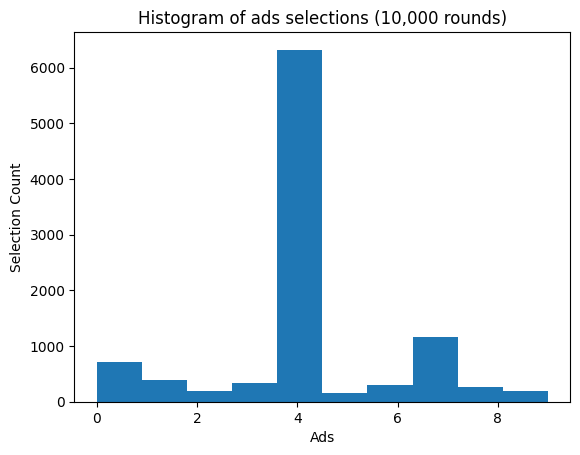

In [12]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections (10,000 rounds)')
plt.xlabel('Ads')
plt.ylabel('Selection Count')
plt.show()

## Implementing with 1000 rounds

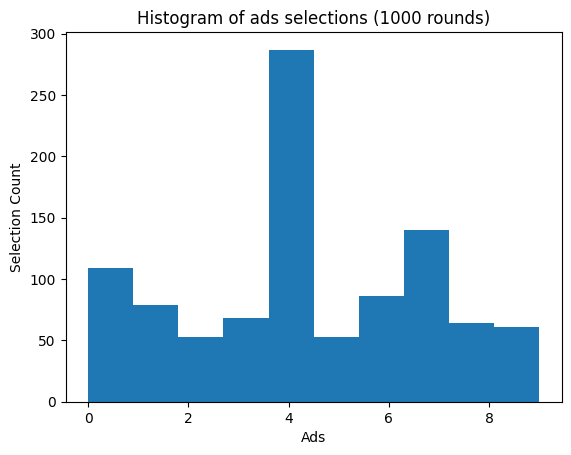

In [13]:
# Declaring variables

N = 1000   # Number of users
d = 10      # Number of ads

ads_selected = []     
selection_count = [0] * d   # Number of times an ad was selected, list of n zeros
rewards = [0]*d     # Total reward of an ad

for n in range(N):

    upper_bound_max = 0
    ad_picked = 0

    for i in range(d):

        if(selection_count[i] > 0):
            avg_reward = rewards[i] / selection_count[i]
            delattr = math.sqrt(3/2 * math.log(n+1) / selection_count[i])
            upper_bound = avg_reward + delattr
        else:
            upper_bound = 1e400  # Infinity
        
        if(upper_bound > upper_bound_max):
            upper_bound_max = upper_bound
            ad_picked = i
    
    # We are Picking Only one Ad after every round, so first 10 rounds, Ads will be selected in serial order.
    ads_selected.append(ad_picked)
    selection_count[ad_picked] += 1

    # fetching the reward value by user, (0 if not Cliked, 1 if Cliked)
    reward = dataset.values[n, ad_picked] 
    
    # addint it to total reward for the Ad.
    rewards[ad_picked] += reward 

#visualizing the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections (1000 rounds)')
plt.xlabel('Ads')
plt.ylabel('Selection Count')
plt.show()

- As we can see that, The results are preaty much the same, for both 1000 rounds and 10,000 rounds, where Ad-4 was most cliked Ad.

- If the same thing was calculated using a probability based theroem, like naive bayes, Sample from The whole dataset would be required, for correct predictions.

- UCB can produce deicent results with less number of trials i.e, reduce the time & resources required for Exploration process, and increase the over all profit.